In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)


In [4]:
df = pd.read_csv("C:\\Users\\shrey\\Downloads\\Walmart_Sales.csv")

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (6435, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.describe()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
df.isnull().sum()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
df.duplicated().sum()


np.int64(0)

In [11]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)


In [12]:
df = df.drop_duplicates()


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [14]:
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())


Duplicates before: 0
Duplicates after: 0


In [15]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week
df["Day"] = df["Date"].dt.day


In [16]:
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9,5


In [17]:
df["Sales_Category"] = pd.cut(
    df["Weekly_Sales"],
    bins=3,
    labels=["Low", "Medium", "High"]
)


In [18]:
df["Sales_Category"].value_counts()



Sales_Category
Low       4793
Medium    1602
High        40
Name: count, dtype: int64

In [19]:
df.groupby("Store")["Weekly_Sales"].mean().sort_values(ascending=False)


Store
20    2.107677e+06
4     2.094713e+06
14    2.020978e+06
13    2.003620e+06
2     1.925751e+06
10    1.899425e+06
27    1.775216e+06
6     1.564728e+06
1     1.555264e+06
39    1.450668e+06
19    1.444999e+06
31    1.395901e+06
23    1.389864e+06
24    1.356755e+06
11    1.356383e+06
28    1.323522e+06
41    1.268125e+06
32    1.166568e+06
18    1.084718e+06
22    1.028501e+06
12    1.009002e+06
26    1.002912e+06
34    9.667816e+05
40    9.641280e+05
35    9.197250e+05
8     9.087495e+05
17    8.935814e+05
45    7.859814e+05
21    7.560691e+05
25    7.067215e+05
43    6.333247e+05
15    6.233125e+05
7     5.706173e+05
42    5.564039e+05
9     5.439806e+05
29    5.394514e+05
16    5.192477e+05
37    5.189003e+05
30    4.385796e+05
3     4.027044e+05
38    3.857317e+05
36    3.735120e+05
5     3.180118e+05
44    3.027489e+05
33    2.598617e+05
Name: Weekly_Sales, dtype: float64

In [20]:
df.groupby("Holiday_Flag")["Weekly_Sales"].mean()


Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

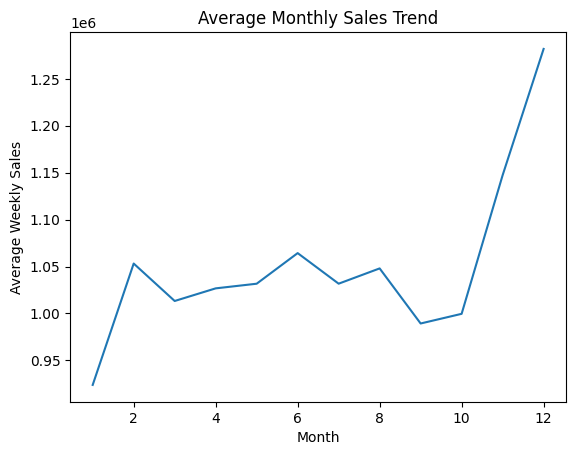

In [21]:
df.groupby("Month")["Weekly_Sales"].mean().plot(kind="line")
plt.title("Average Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.show()


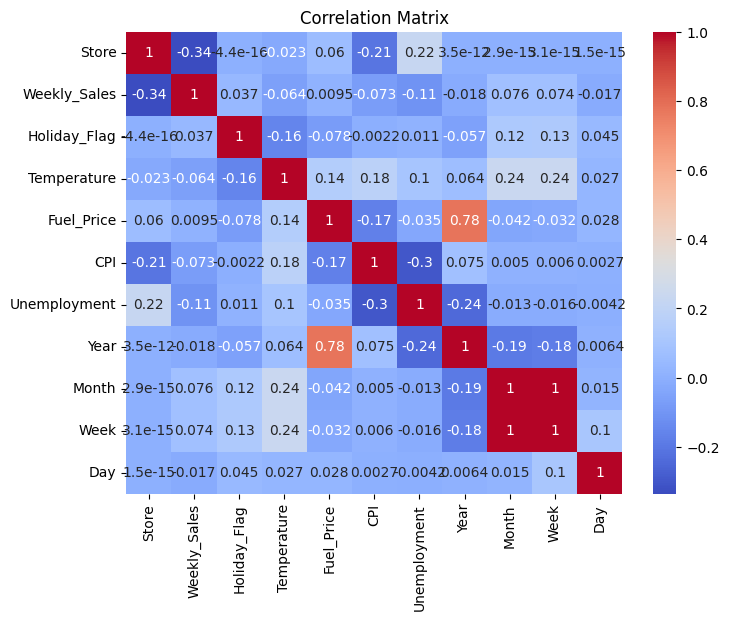

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [23]:
df.to_csv("cleaned_walmart_sales.csv", index=False)
